<a href="https://colab.research.google.com/github/ykykyk112/machine_learning/blob/main/sklearn_exercise/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def make_ndarray(target_list, each_size) :
    # 784 means bitmap size
    data = np.empty((len(target_list)*each_size, 784))
    target = np.empty((len(target_list)*each_size))
    for label, filename in enumerate(target_list) :
        npy = np.load('/content/drive/MyDrive/Colab_Notebooks/quickdraw/{}.npy'.format(filename))
        tmp = np.arange(npy.shape[0])
        idx = np.random.choice(tmp, each_size, replace=False)
        data[label*each_size:(label+1)*each_size] = npy[idx]
        target[label*each_size:(label+1)*each_size] = label
        print('{} is Complete'.format(filename))
    s_idx = np.arange(target.shape[0])
    np.random.shuffle(s_idx)
    data = data[s_idx]
    target = target[s_idx]
    print('result shape : {0} & {1}'.format(data.shape, target.shape))
    return data, target

target_list = ['ant', 'bicycle', 'bird', 'butterfly', 'camel', 'clock', 'cow', 'diamond']
data, target = make_ndarray(target_list=target_list, each_size=10000)

ant is Complete
bicycle is Complete
bird is Complete
butterfly is Complete
camel is Complete
clock is Complete
cow is Complete
diamond is Complete
result shape : (80000, 784) & (80000,)


In [19]:
X = data
y = target

In [20]:
X.shape

(80000, 784)

In [21]:
pca = PCA(n_components=0.95, random_state=42)

In [22]:
sample = X[0].reshape(28, 28)

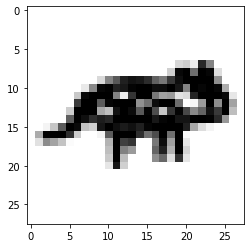

In [23]:
plt.imshow(sample, cmap = 'binary')

In [24]:
X_reduced = pca.fit_transform(X)

In [25]:
X_reduced.shape

(80000, 275)

In [26]:
pca.explained_variance_ratio_

array([0.07385316, 0.03796082, 0.03230328, 0.02752429, 0.02598325,
       0.02209847, 0.01843401, 0.01701421, 0.01477397, 0.01453384,
       0.01325261, 0.01262214, 0.01182524, 0.01142948, 0.01130032,
       0.0106279 , 0.01047718, 0.00997799, 0.00911901, 0.00906584,
       0.0087728 , 0.00857714, 0.0083123 , 0.00795087, 0.0078374 ,
       0.00778259, 0.00752237, 0.00733586, 0.00713405, 0.00689838,
       0.00681444, 0.00676071, 0.00637802, 0.00632935, 0.00628503,
       0.006146  , 0.00608909, 0.00604221, 0.0058223 , 0.0057297 ,
       0.00563311, 0.00554281, 0.0054186 , 0.00534752, 0.00530233,
       0.00523716, 0.00506284, 0.00497757, 0.00490747, 0.00479714,
       0.00470504, 0.00458348, 0.00449622, 0.00443185, 0.00437947,
       0.00437309, 0.00429439, 0.00420347, 0.00415174, 0.00410771,
       0.00404176, 0.00393595, 0.00391816, 0.00387076, 0.00381324,
       0.00374902, 0.00367596, 0.00358433, 0.00357921, 0.0035088 ,
       0.00348012, 0.00345363, 0.00339407, 0.00335367, 0.00331

In [27]:
pca.explained_variance_ratio_.shape

(275,)

In [28]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.07385316, 0.11181398, 0.14411726, 0.17164155, 0.1976248 ,
       0.21972327, 0.23815728, 0.25517149, 0.26994546, 0.2844793 ,
       0.29773191, 0.31035406, 0.3221793 , 0.33360878, 0.3449091 ,
       0.35553701, 0.36601419, 0.37599218, 0.38511119, 0.39417703,
       0.40294982, 0.41152696, 0.41983927, 0.42779014, 0.43562754,
       0.44341014, 0.45093251, 0.45826837, 0.46540242, 0.4723008 ,
       0.47911524, 0.48587594, 0.49225397, 0.49858332, 0.50486835,
       0.51101435, 0.51710344, 0.52314565, 0.52896795, 0.53469765,
       0.54033076, 0.54587357, 0.55129216, 0.55663968, 0.56194201,
       0.56717918, 0.57224202, 0.57721959, 0.58212706, 0.5869242 ,
       0.59162924, 0.59621273, 0.60070895, 0.6051408 , 0.60952028,
       0.61389337, 0.61818776, 0.62239122, 0.62654296, 0.63065067,
       0.63469243, 0.63862838, 0.64254654, 0.6464173 , 0.65023054,
       0.65397956, 0.65765552, 0.66123985, 0.66481906, 0.66832785,
       0.67180797, 0.67526159, 0.67865566, 0.68200934, 0.68532

In [29]:
x_axis = np.linspace(0, cumsum.shape[0], cumsum.shape[0])
y_axis = cumsum
x_axis.shape

(275,)

Text(0.5, 1.0, 'Variance change trend')

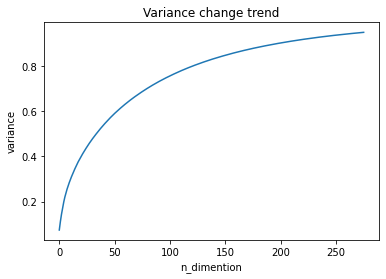

In [30]:
plt.plot(x_axis, y_axis)
plt.xlabel('n_dimention')
plt.ylabel('variance')
plt.title('Variance change trend')

In [31]:
pca.singular_values_

array([166426.48244172, 119317.91878573, 110068.04053511, 101600.51870791,
        98715.34089537,  91037.23255904,  83147.23501596,  79881.05037081,
        74436.59018828,  73829.18921699,  70499.92926242,  68802.53498923,
        66595.20424242,  65471.32871088,  65100.34857892,  63133.7631834 ,
        62684.49697561,  61172.95620986,  58480.57746504,  58309.84452705,
        57359.70256757,  56716.46914522,  55833.97900261,  54606.62456966,
        54215.56668974,  54025.65612012,  53114.76868124,  52452.16804857,
        51725.66412617,  50864.10571353,  50553.69029878,  50353.9933333 ,
        48908.12203815,  48721.15414462,  48550.25440428,  48010.25692372,
        47787.49118032,  47603.16618278,  46728.86286672,  46355.77685732,
        45963.37966336,  45593.4841369 ,  45079.73082088,  44783.08873246,
        44593.47845796,  44318.58978859,  43574.77272709,  43206.26828829,
        42900.92460589,  42415.92083004,  42006.81396097,  41460.61931427,
        41064.04805961,  

In [32]:
X_recovered = pca.inverse_transform(X_reduced)

In [42]:
sample_origin = X[:4].reshape(-1, 28, 28)
sample_recovered = X_recovered[:4].reshape(-1, 28, 28)

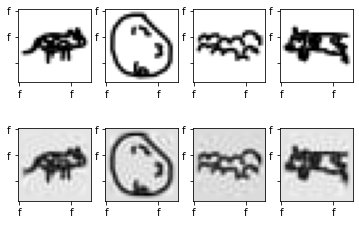

In [51]:
def plot_origin_recovered(origin, recovered) :
    plot_image = np.append(origin, recovered, axis=0)
    row = 2
    col = 4
    fig = plt.figure()
    for i in range(row*col) :
        sub = fig.add_subplot(row, col, i+1)
        sub.set_xticklabels('off')
        sub.set_yticklabels('off')
        sub.imshow(plot_image[i], cmap='binary')
    fig.show()

plot_origin_recovered(sample_origin, sample_recovered)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)
X_train_recovered, X_test_recovered, y_train, y_test = train_test_split(X_recovered, y, test_size = 0.2, random_state = 42)

In [64]:
print(X.shape)
print(X_reduced.shape)
print(X_recovered.shape)

(80000, 784)
(80000, 275)
(80000, 784)


In [65]:
from sklearn.ensemble import RandomForestClassifier
origin_clf = RandomForestClassifier(random_state = 42, verbose = 2)
origin_clf.fit(X_train, y_train)
origin_clf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


0.7923125

In [66]:
reduct_clf = RandomForestClassifier(random_state=42, verbose=2)
reduct_clf.fit(X_train_reduced, y_train)
reduct_clf.score(X_test_reduced, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


0.757375

In [67]:
recover_clf = RandomForestClassifier(random_state=42, verbose=2)
recover_clf.fit(X_train_recovered, y_train)
recover_clf.score(X_test_recovered, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


0.7729375